# pycocotools 사용하기

In [23]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import torch
import pylab
import random
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

%matplotlib inline

## 1. 준비
### gpu 연결

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# gpu연산 설정
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')
print("cuda number : ", os.environ["CUDA_VISIBLE_DEVICES"])
print("cuda device : ", torch.cuda.device_count())

cuda:1 is available
cuda number :  1
cuda device :  1


## 2. 이미지 확인

In [25]:
data_dir = './images/train'

img_dir = './images/train'

In [37]:
# coco api 초기화
coco = COCO('annotation_default.json')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [38]:
# 카테고리 불러오기
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
person animal



In [59]:
# 카테고리 person, animal이 있는 이미지 확인
catIds = coco.getCatIds(catNms=['person', 'animal']);
imgIds = coco.getImgIds(catIds=catIds);
random_img_id = random.choice(imgIds)
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]

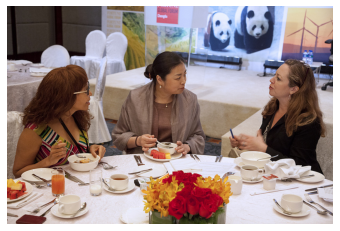

In [61]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

## 3. annotation 시각화

In [63]:
#get damage annotations
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)

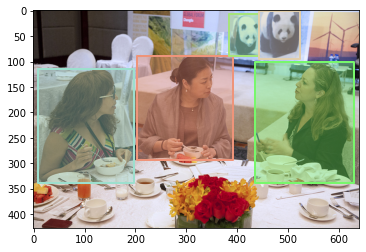

In [64]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True)